In [1]:
import tensorflow as tf 
print(tf.__version__)


2.15.0


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data = mnist.load_data()

In [5]:
print(data)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [23]:
#Minist를 읽어와서 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784) #11~12행 reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0 #float32 데이터형으로 변환하고 [0,255]범위를 [0,1]범위로 정규화
x_test = x_test.astype(np.float32)/255.0

#레이블을 원핫코드로 변환
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 모델 학습하기
n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add (Dense(units=n_hidden,activation='tanh',input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units=n_output,activation='tanh',kernel_initializer='random_uniform',bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist=mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res=mlp.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)


Epoch 1/30
469/469 - 3s - loss: 0.0426 - accuracy: 0.8462 - val_loss: 0.0276 - val_accuracy: 0.9132 - 3s/epoch - 7ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0221 - accuracy: 0.9296 - val_loss: 0.0173 - val_accuracy: 0.9440 - 3s/epoch - 6ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0164 - accuracy: 0.9482 - val_loss: 0.0149 - val_accuracy: 0.9524 - 3s/epoch - 6ms/step
Epoch 4/30
469/469 - 3s - loss: 0.0138 - accuracy: 0.9574 - val_loss: 0.0138 - val_accuracy: 0.9597 - 3s/epoch - 6ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0121 - accuracy: 0.9636 - val_loss: 0.0120 - val_accuracy: 0.9619 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 3s - loss: 0.0109 - accuracy: 0.9681 - val_loss: 0.0109 - val_accuracy: 0.9663 - 3s/epoch - 7ms/step
Epoch 7/30
469/469 - 4s - loss: 0.0101 - accuracy: 0.9717 - val_loss: 0.0104 - val_accuracy: 0.9666 - 4s/epoch - 8ms/step
Epoch 8/30
469/469 - 4s - loss: 0.0094 - accuracy: 0.9738 - val_loss: 0.0098 - val_accuracy: 0.9684 - 4s/epoch - 8ms/step
Epoch 9/30
469/469 - 3s 

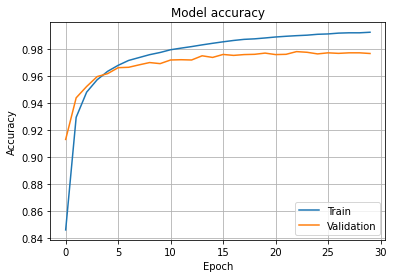

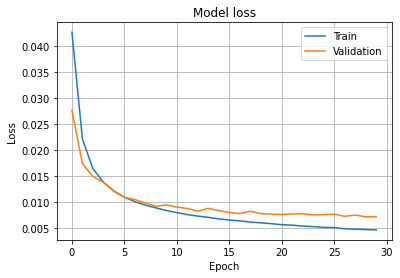

In [24]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()